In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import os
import cv2

In [9]:
def histogram_equivalization(arr: np.ndarray):
    tot_pixels = arr.shape[0]*arr.shape[1]
    freq = Counter(np.ravel(arr).tolist()) # get freq of the items
    freq = sorted(freq.items(), key=lambda l: l[0]) # sort by intensity values
    mp = defaultdict(int)
    cumm_sum = 0
    for intensity, count in freq:
        cumm_sum += count
        prob = cumm_sum/tot_pixels
        mp[intensity] = int(255*prob)
    
    map_func = np.vectorize(lambda x: mp.get(x, x)) # func to map old intensities to new intensities
    new_arr = map_func(arr)
    return new_arr.astype(np.uint8) # 8 bit encoding for grayscale image

def adaptive_histogram_equivalization(arr: np.ndarray, tile_size: int):
    new_arr = arr.copy()
    for i in range(0, arr.shape[0], tile_size):
        for j in range(0, arr.shape[1], tile_size):
            new_arr[i:i+tile_size, j:j+tile_size] = cv2.equalizeHist(arr[i:i+tile_size, j:j+tile_size])
    return new_arr

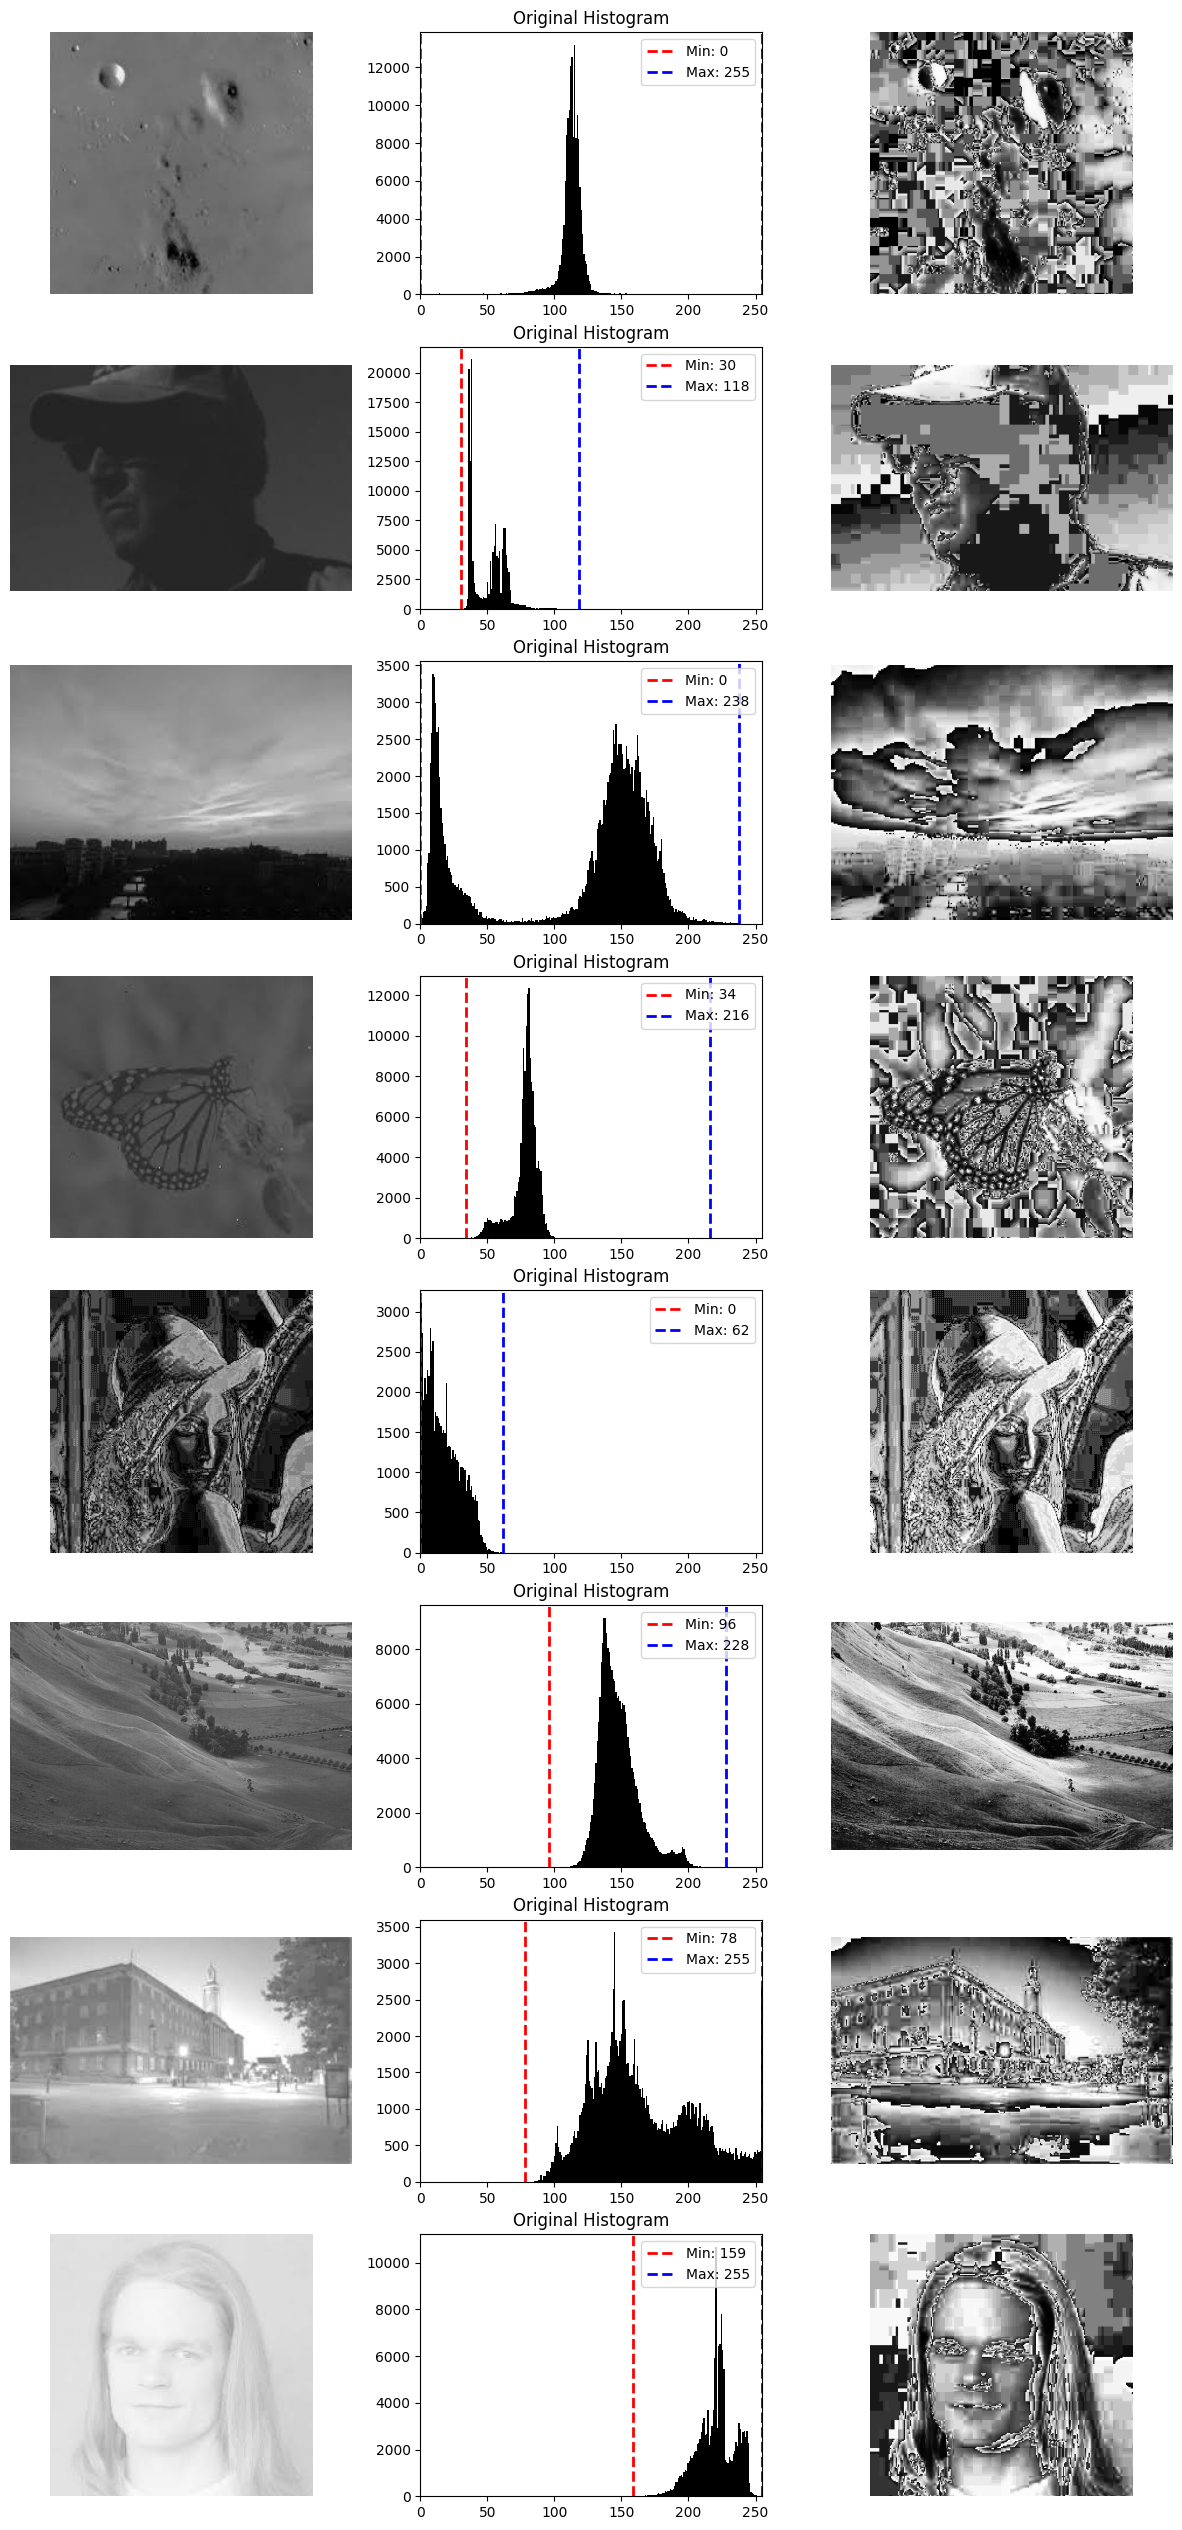

In [20]:
image_paths = [os.path.join('imgs', filename) for filename in os.listdir("imgs")]
num_images = len(image_paths)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
_, axs = plt.subplots(num_images, 3, figsize=(15, 4*num_images))
for i in range(num_images):
    original_arr = np.array(Image.open(image_paths[i]))
    min_val, max_val = np.min(original_arr), np.max(original_arr)

    axs[i, 0].imshow(original_arr, cmap="gray")
    axs[i, 0].axis("off")
    # Plot the histogram of the original image in the middle column
    axs[i, 1].hist(original_arr.ravel(), bins=256, range=(0, 255), color='black')
    axs[i, 1].set_title("Original Histogram")
    axs[i, 1].set_xlim([0, 255])
    axs[i, 1].axvline(min_val, color='red', linestyle='--', linewidth=2, label=f'Min: {min_val}')
    axs[i, 1].axvline(max_val, color='blue', linestyle='--', linewidth=2, label=f'Max: {max_val}')
    axs[i, 1].legend(loc='upper right')

    axs[i, 2].imshow(histogram_equivalization(original_arr), cmap="gray")
    axs[i, 2].axis("off")

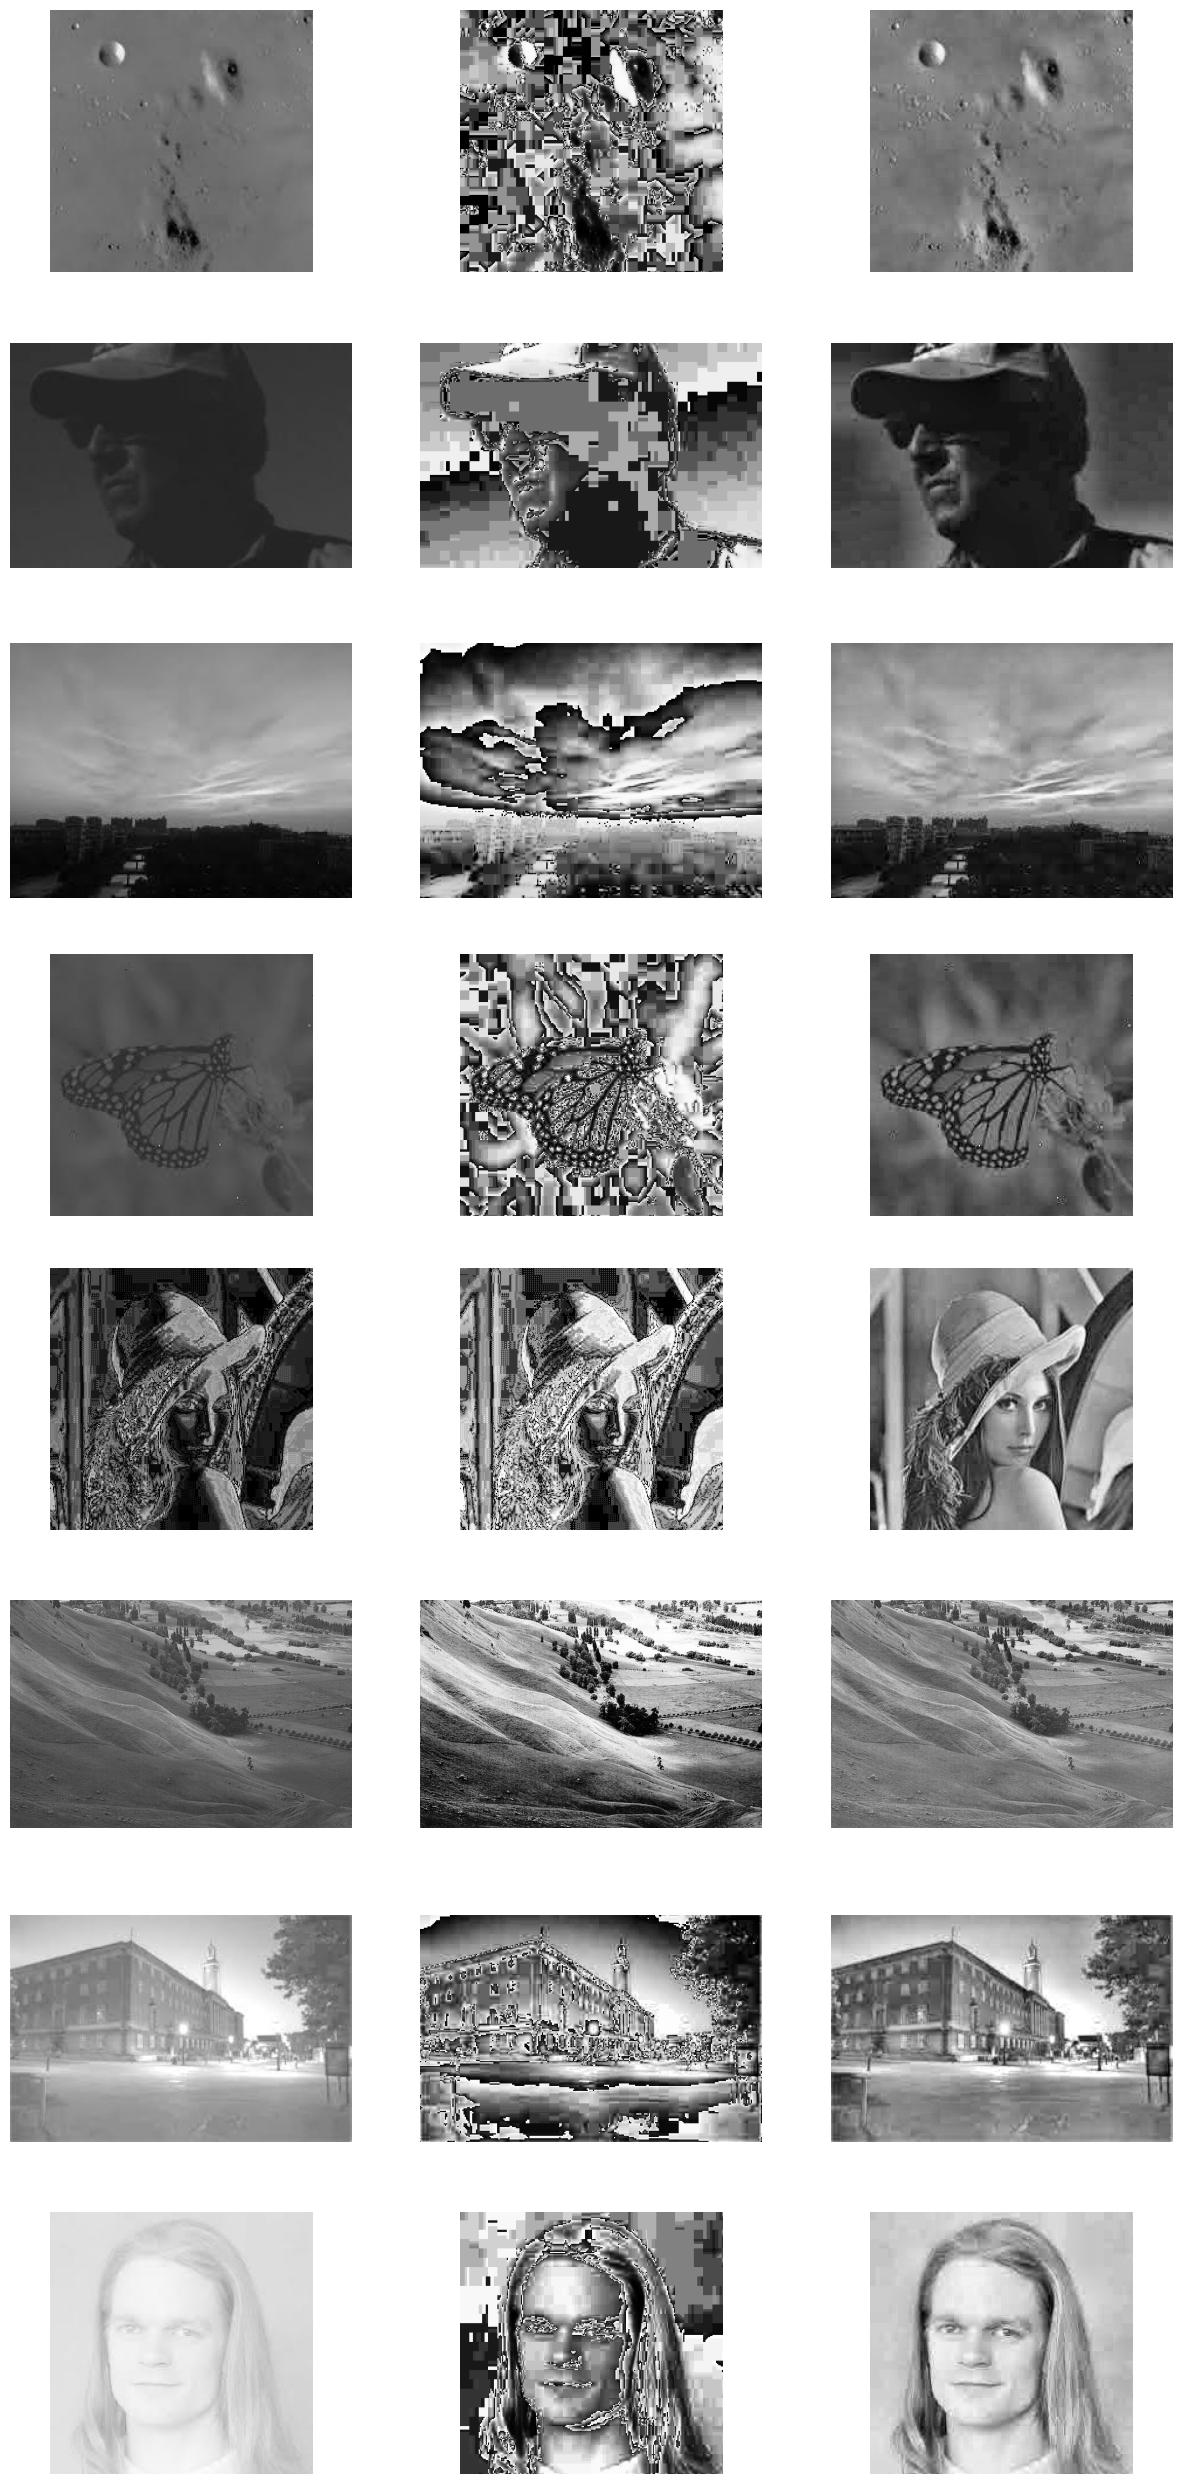

In [21]:
image_paths = [os.path.join('imgs', filename) for filename in os.listdir("imgs")]
num_images = len(image_paths)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
_, axs = plt.subplots(num_images, 3, figsize=(15, 4*num_images))
for i in range(num_images):
    original_arr = np.array(Image.open(image_paths[i]))
    min_val, max_val = np.min(original_arr), np.max(original_arr)
    axs[i, 0].imshow(original_arr, cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(histogram_equivalization(original_arr), cmap="gray")
    axs[i, 1].axis("off")
    try:
        cv_im = cv2.imread(image_paths[i], cv2.IMREAD_GRAYSCALE)
        axs[i, 2].imshow(clahe.apply(cv_im), cmap="gray")
        axs[i, 2].axis("off")
    except:
        axs[i, 2].imshow(clahe.apply(original_arr), cmap="gray")
        axs[i, 2].axis("off")